<a href="https://colab.research.google.com/github/ujwal0127/CodeAlpha_Projects/blob/main/CharacterRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
data = pd.read_csv("/content/A_Z Handwritten Data.csv")
print(data.shape)


(101467, 785)


In [ ]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


In [ ]:
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)


In [ ]:
y = to_categorical(y, num_classes=26)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (81173, 28, 28, 1)
Testing data: (20294, 28, 28, 1)


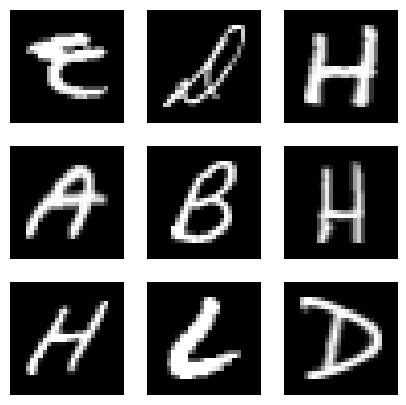

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 63s 107ms/step - accuracy: 0.7449 - loss: 0.8540 - val_accuracy: 0.9763 - val_loss: 0.0811
Epoch 2/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9622 - loss: 0.1289 - val_accuracy: 0.9812 - val_loss: 0.0604
Epoch 3/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 66s 116ms/step - accuracy: 0.9723 - loss: 0.0900 - val_accuracy: 0.9842 - val_loss: 0.0556
Epoch 4/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 61s 107ms/step - accuracy: 0.9767 - loss: 0.0762 - val_accuracy: 0.9861 - val_loss: 0.0541
Epoch 5/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 59s 104ms/step - accuracy: 0.9818 - loss: 0.0619 - val_accuracy: 0.9866 - val_loss: 0.0452
Epoch 6/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.9835 - loss: 0.0548 - val_accuracy: 0.9888 - val_loss: 0.0403
Epoch 7/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.9857 - loss: 0.0466 - val_accuracy: 0.9898 - val_loss: 0.0393
Epoch 8/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9877 - loss: 0.0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


635/635 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9930 - loss: nan
Test Accuracy: 0.9927071928977966


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Letter: J


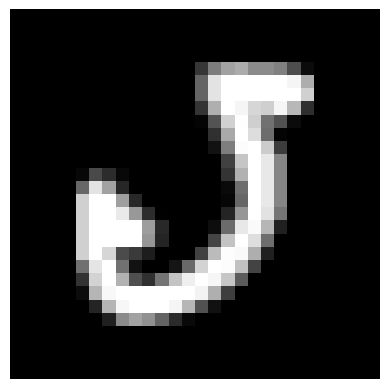

In [ ]:
index = 10
prediction = model.predict(X_test[index].reshape(1,28,28,1))
predicted_label = np.argmax(prediction)

print("Predicted Letter:", chr(predicted_label + 65))

plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
model.save("handwritten_alphabet_cnn.h5")


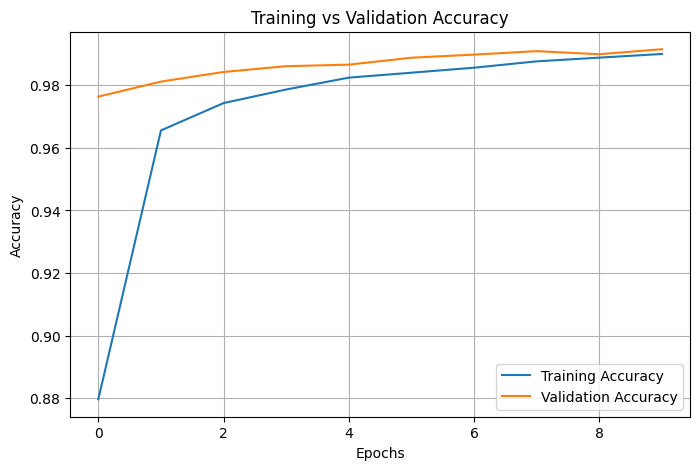

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()
